In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
%matplotlib inline

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head(20)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.shape

(1338, 7)

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [11]:
import missingno as msno

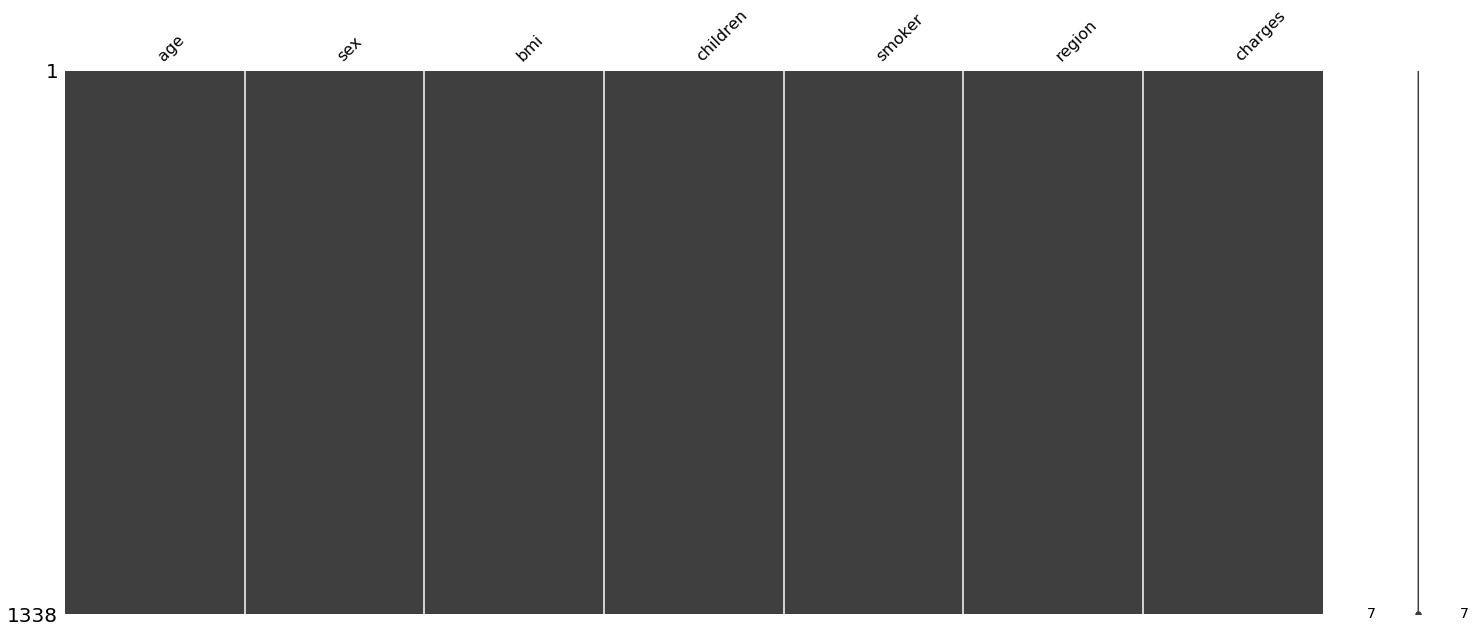

In [12]:
msno.matrix(df)


In [13]:
# We Now do exploratory data analysis of our data

In [14]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

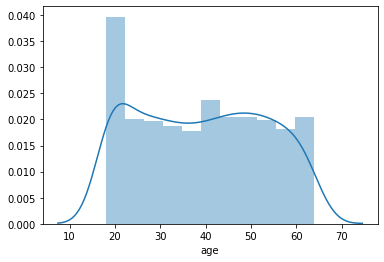

In [15]:
sns.distplot(df.age)

In [16]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [17]:
df.sex.value_counts()/len(df.sex)

male      0.505232
female    0.494768
Name: sex, dtype: float64

In [18]:
df.bmi.describe()


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

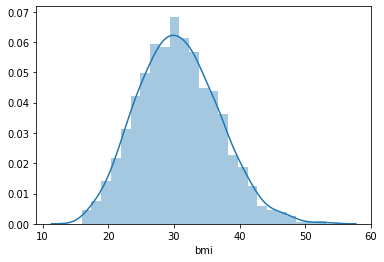

In [19]:
sns.distplot(df.bmi)

In [20]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [21]:
df.smoker.value_counts()/len(df)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

In [22]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [23]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

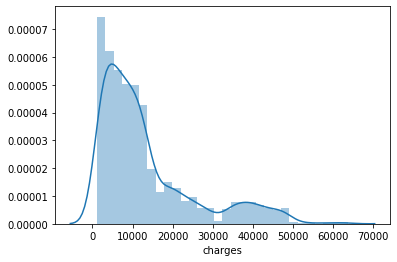

In [24]:
sns.distplot(df.charges)

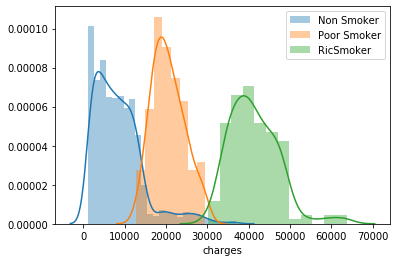

In [30]:
sns.distplot(df[df.smoker=='no'].charges,label='Non Smoker')
sns.distplot(df[(df.smoker=='yes')& (df.charges<30000)].charges,label='Poor Smoker')
sns.distplot(df[(df.smoker=='yes')& (df.charges>30000)].charges,label='RicSmoker')
plt.legend()

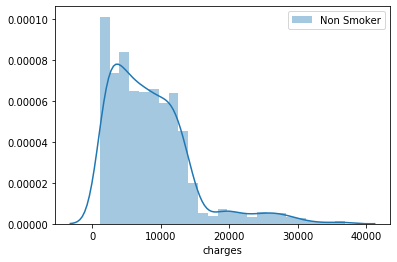

In [32]:
sns.distplot(df[df.smoker=='no'].charges,label='Non Smoker');
plt.legend()

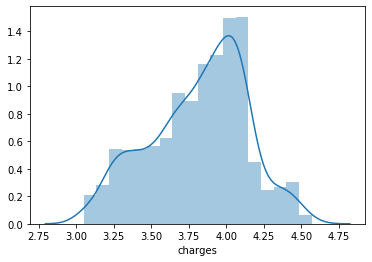

In [33]:
sns.distplot(np.log10(df[df.smoker=='no'].charges))

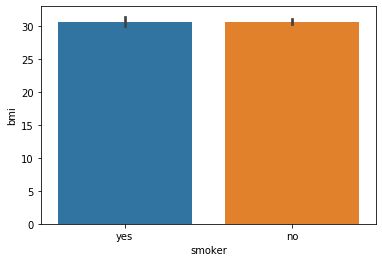

In [37]:
sns.barplot(df.smoker,df.bmi)

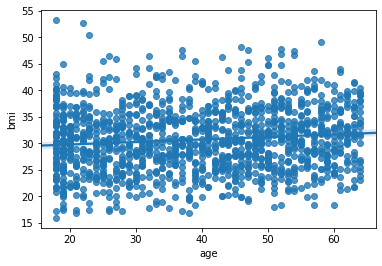

In [39]:
sns.regplot(df.age,df.bmi)

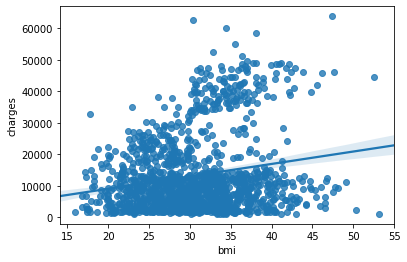

In [45]:
sns.regplot(df.bmi,df.charges)

In [48]:
df.groupby('region').max()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,64,male,48.07,5,yes,58571.07448
northwest,64,male,42.94,5,yes,60021.39897
southeast,64,male,53.13,5,yes,63770.42801
southwest,64,male,47.60,5,yes,52590.82939


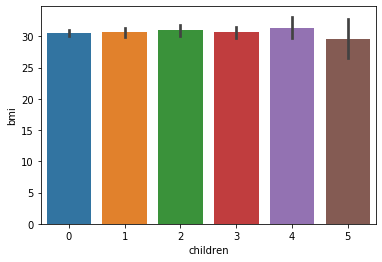

In [50]:
sns.barplot(df.children,df.bmi)

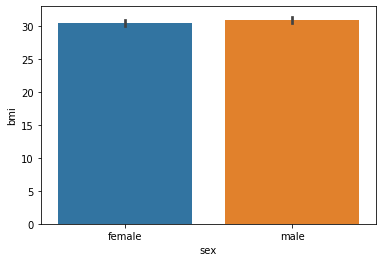

In [53]:
sns.barplot(df.sex,df.bmi)


In [54]:
df.groupby('sex')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


In [56]:
df.groupby(['smoker','children'])['charges'].mean()


smoker  children
no      0            7611.793335
        1            8303.109350
        2            9493.093674
        3            9614.519391
        4           12121.344408
        5            8183.845556
yes     0           31341.363954
        1           31822.654334
        2           33844.235755
        3           32724.915268
        4           26532.276933
        5           19023.260000
Name: charges, dtype: float64

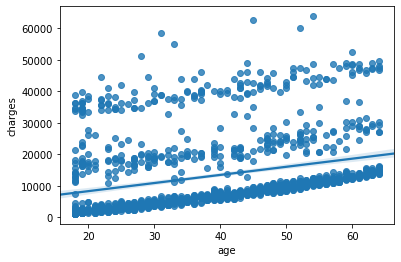

In [58]:
sns.regplot(df.age,df.charges)

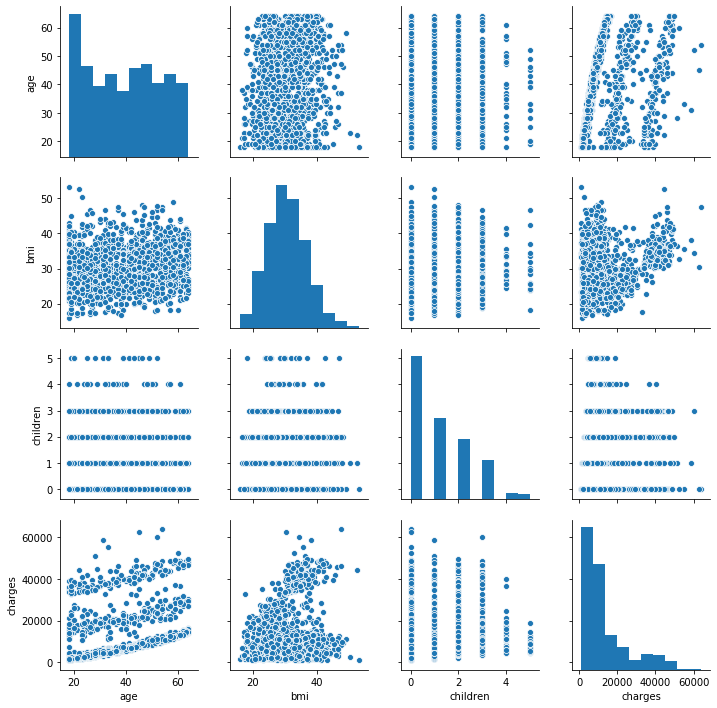

In [61]:
sns.pairplot(df)